<a href="https://colab.research.google.com/github/linnea-backgard/ai-ml-principles-exercises/blob/main/ML-training/cv-crash-course/digit_classification_sklearn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import sklearn
import numpy as np

In [20]:
import sklearn.datasets as datasets
from PIL import Image

In [4]:
data = datasets.load_digits()

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

5


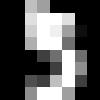

In [32]:
i = 5
print(data.target[i])
Image.fromarray((data.images[i]/16 * 255).astype(np.uint8), "L").resize((100, 100), resample = Image.NEAREST)

In [11]:
data.target[0]

0

In [19]:

np.max(data.images)

16.0